# PA 2: Classification - Decision Tree

## --> Student Details [3 Points]

Notes: When submitting, fill your name and ID in this cell.  [1 point]

First Student Name and ID: Venkata Sravanthi Pasam 1001856459 <br>
Second Student Name and ID: Kartik Kataria 1001944865 <br>
Third Student Name and ID: Suraj Pawar Vadeghar 1002021883

## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status 
* education     --> highest education finished  
* default       --> already has credit in default? 
* balance       --> account balance 
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact 
* duration      --> duration of last contact 
* campaign      --> number of contacts made to the client during the campaign 
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted) 
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


## --> Programming Assignment Details

1) For this assignment use Jupyter notebook

2) You can use libraries: Numpy, Pandas, Scikit-learn, Matplotlib and Seaborn

3) Make sure to write about 2-3 lines to explain any kind of visualization

4) Do not to forget to cite any external sources used by you.

#### <b>Note: Please consult the TA before using libraries other than the ones mentioned above</b>

### Hints - 

1) Apart from null values, the dataset consists of "unknown" (string) values in multiple columns. You need to handle them as a part of null values.

1) To compress the data, numerous columns might be combined into one feature. There might even be columns with redundant data, i.e., information from a column might also be available from another column. If there are such columns, you can drop them. 

2) Categorized Data is preferable for decision trees.  If needed, figure out how to convert continuous feature to categorical and implement it.

3) Unwanted data can reduce the model's accuracy.

## Tasks

* Import the libraries and load the dataset (from the csv file) [5 points]

* Pre-process the dataset and provide a detailed explanation.  [25 points]

* Perform 2 visualizations of the features with respect to target variable with detailed explanation. [15 points]

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation. [10 points]

* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.  [5 points]

* Use comments to explain your code and variable names. [3 points]

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria. [20 points]

* Compare the results of the classifier using gini and entropy [5 points]

* Print the decision tree visualization with depth of 5 [5 points]

## <i>Note:</i>
#### There is no separate report for Decision Tree. Hence, you are required to explain your work for all the aforementioned tasks in the markdown cells in Jupyter notebook and through comments.

## Programming Assignment Submission Instructions [2 Points]

### Each file should be submitted separately, do not compress them

For Decision Tree:
1.	'yourLastName_Last4digitsofyourID_DT.ipynb' (Report/Explanation in markdown cells and code in code cells of Notebook preferred)

# Begin your code from here

### Import the libraries and load the dataset

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,ConfusionMatrixDisplay




In [369]:
# loading dataset
df_data=pd.read_csv('dataset_DT.csv')

### Pre-process the dataset and provide a detailed explanation.

In [370]:
# References: 
#https://towardsdatascience.com/3-ultimate-ways-to-deal-with-missing-values-in-python-ac5a17c53787#:~:text=You%20can%20use%20pandas%20DataFrame,contain%20atleast%20one%20missing%20value.
#https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f#:~:text=To%20find%20duplicates%20on%20a,()%20method%20on%20the%20column.&text=The%20result%20is%20a%20boolean,identical%20to%20a%20previous%20one.

#checking for null values in the dataset
is_null = df_data.columns[df_data.isna().any()]
print("\n>>column name and number of null entries in the column\n",df_data[is_null].isna().sum())




>>column name and number of null entries in the column
 education    320
day          306
month        314
dtype: int64


In [371]:
#Reference : 
# https://www.datasciencesmachinelearning.com/2018/11/handling-missing-values-in-python.html
# http://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.DataFrame.interpolate.html
# https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e#:~:text=Delete%20Rows%20with%20Missing%20Values,entire%20column%20can%20be%20dropped.
#https://towardsdatascience.com/3-ultimate-ways-to-deal-with-missing-values-in-python-ac5a17c53787#:~:text=You%20can%20use%20pandas%20DataFrame,contain%20atleast%20one%20missing%20value.
#https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f#:~:text=To%20find%20duplicates%20on%20a,()%20method%20on%20the%20column.&text=The%20result%20is%20a%20boolean,identical%20to%20a%20previous%20one.

#filling the null values in the education column with the most frequent observations
df_data['education'] = df_data['education'].fillna(df_data['education'].mode()[0])

#as the data is ordered by date,filling the null values in day and month using bfill method
df_data['month'] = df_data['month'].fillna(method='bfill')
df_data['day'] = df_data['day'].fillna(method='bfill')

#dropping the contact,day columns as they do not have any impact on the data
df_data.drop(['contact'], axis=1, inplace=True)

#All the null values have been handled
#making a copy of the data
df2_data = df_data.copy()

#checking if there are any duplicates rows in the dataset
df_data.duplicated().sum()

#checking categorical variables
df_data.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object

In [372]:
# Reference:
# https://www.kaggle.com/code/vaishnavi28krishna/imbalanced-data-process-and-decsision-tree#Encoding

# Converting the categorical variables
df_data['job'] = df_data['job'].map({'unknown':0, 'admin.':1,'blue-collar':2,'entrepreneur':3,'housemaid':4,'management':5,
                               'retired':6,'self-employed':7,'services':8,'student':9,'technician':10,'unemployed':11})
df_data['marital'] = df_data['marital'].map({'single':0,'married':1,'divorced':2})
df_data['education'] = df_data['education'].map({'unknown':0,'primary':1,'secondary':2,'tertiary':3})
df_data['default'] = df_data['default'].map({'yes':1,'no':0})
df_data['housing'] = df_data['housing'].map({'yes':1,'no':0})
df_data['loan'] = df_data['loan'].map({'no':0,'yes':1})
df_data['month'] = df_data['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
df_data['poutcome'] = df_data['poutcome'].map({'unknown':0,'success':1,'failure':2,'other':3})
df_data['y'] = df_data['y'].map({'no':0,'yes':1})

df_data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,2,0,2,0,13408.0,0,0,1.0,4,647.0,2.0,-1.0,0.0,0,0
1,49.0,5,2,3,0,20727.0,0,0,1.0,4,285.0,3.0,132.0,2.0,2,0
2,32.0,8,0,3,0,1743.0,1,0,1.0,4,1156.0,1.0,261.0,3.0,3,0
3,46.0,5,2,3,0,10469.0,1,0,1.0,4,202.0,2.0,-1.0,0.0,0,0
4,26.0,5,0,3,0,7628.0,0,0,1.0,4,263.0,1.0,-1.0,0.0,0,0


### Preprocessing Explanation:
Initially there were 3 columns with null values in the dataset
education    320
day          306
month        314

Since the number of null values is less compared to the size of the data set, we have performed imputations on these columns.
'education' column has been filled with the most frequent observation i.e the mode from the 'education' column
Since the dataset is ordered by date, the empty values can be replaced with the data similar to its next row.
So 'month; and 'day' column has been filled using "bfill" method.

##### 'contact' column doesn't seem to have much influence on the target variable as all the customers are contacted in one or the other way. Hence we have dropped 'contact' column.

Categorical columns has been converted to make the predictions simpler.
So all the categorical columns have been mapped to an equivalent numeric value

##### UNKNOWN data:
Few columns like 'job', 'education' and 'poutcome' have data called "unknown". This has been handled as a new category as assuming this values might result in loss of data. We have mapped unknown with '0' category in all the coulmns and the other columns with the following numbers.

This preprocessing resulted in less loss of data and also removal of unwanted data.

### Perform 2 visualizations of the features with respect to target variable with detailed explanation.

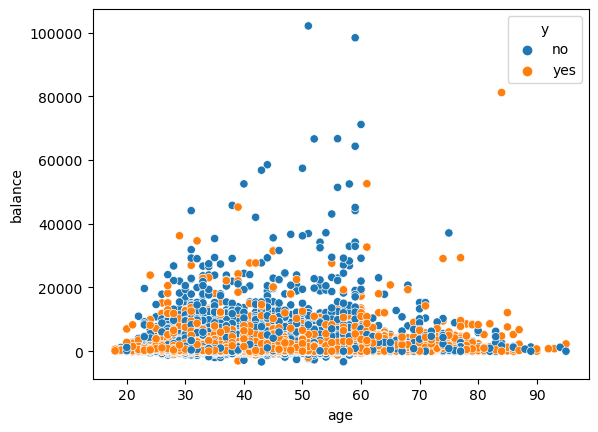

In [373]:
# 1)Scatter plot that visualizes the target variable "y" based on "age" and 'balance'

sns.scatterplot( x='age' , y='balance', data= df2_data, hue='y')
plt.show()



From this plot we can identify that, the maximum range of people who subscribed for the deposit have a balance below 60,000 and belong to age 30 to 70. We can also notice that the people whi did not subscribe for the term deposit are more than the people who subscribed for the term deposit.

<AxesSubplot:xlabel='job', ylabel='count'>

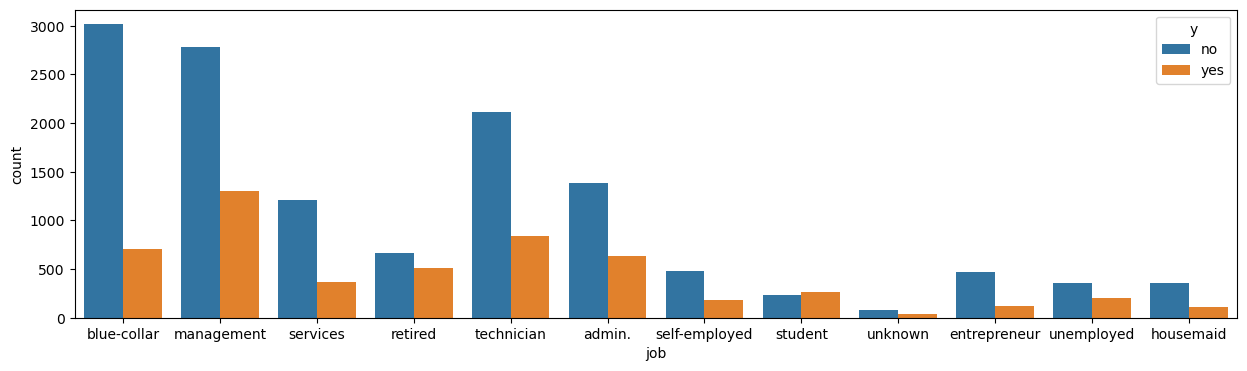

In [374]:
# 2) Visualize the target variable based on job column
plt.figure(figsize=(15,4))
sns.countplot(x='job',hue='y',data=df2_data)


In this plot we are visualzing the 'y' variable using the job column. From this plot we can determine that the 'blue-collar' job holders are the highest number of people who didnot subscribe for the term deposit followed by 'management'.
We can also identify that the 'management' job holders are the highes number of people compared to other jobs who subscribed for the term-deposit

### Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the Six most influential attributes with detailed explanation.

### Split your dataset 75% for training, and 25% for testing the classifier.

In [375]:
#Splitting the data into training and test data and then finding important attributes

X = df_data.loc[:,df_data.columns != 'y']   #Getting all the data except y
Y = df_data.loc[:,'y']  #y is target variable.

# Training and testing the dataset by splitting
X_train_data, X_test_data, Y_train_data,Y_test_data = train_test_split(X, Y, test_size=0.25)

# 75% training data
print('Training Data:',X_train_data.shape )
# 25% test data
print('Testing Data:',X_test_data.shape )

Training Data: (13817, 15)
Testing Data: (4606, 15)


In [376]:
# Calculating feature importance to determine top 6 influential attributes
# Reference: https://aicorespot.io/%E2%80%8Bhow-to-calculate-feature/
# https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf

# Fit the decision tree classifier
model = DecisionTreeClassifier()
model = model.fit(X_train_data, Y_train_data)

feature_imp = model.feature_importances_
importance = zip(feature_imp,X_train_data.columns)
#sorting the features in descending order
importance = sorted(importance,reverse=True)
for v,i in importance: 
    print(f'Feature: {i}, Score: {v:.5f}')

Feature: duration, Score: 0.20654
Feature: day, Score: 0.12198
Feature: age, Score: 0.11924
Feature: balance, Score: 0.11799
Feature: month, Score: 0.11708
Feature: pdays, Score: 0.06581
Feature: housing, Score: 0.05262
Feature: job, Score: 0.04646
Feature: campaign, Score: 0.04180
Feature: poutcome, Score: 0.03722
Feature: education, Score: 0.02589
Feature: marital, Score: 0.01870
Feature: previous, Score: 0.01648
Feature: loan, Score: 0.01166
Feature: default, Score: 0.00053


#### Explanation: 
By Splitting the data into training set and testing set, we can further calculate the feature importance based on which we can determine the most important features in our dataset which helps in predicting the 'y' i.e the target variable. From our calculations these are the observations made:

Feature: duration, Score: 0.20654
Feature: day, Score: 0.12198
Feature: age, Score: 0.11924
Feature: balance, Score: 0.11799
Feature: month, Score: 0.11708
Feature: pdays, Score: 0.06581

'duration' seems to be most influnetial feature, which is likely because longer the duration, more likely the user is in good terms to subscribe the deposit.

'day' is one of the influential attribute because most of the users subscribe to the deposit during some particular days.

'age' is an influential attribute because people belonging to a particular age group are more likely to subscribe.

'balance'is an influential attribute because higher the balance, more likely the subscriber will subscribe to the deposit.

'month' is an influential attribute as it is noticed that the chances of rejecting or accepting the deposits are more in paticular months.

'pdays' is an influential attribute because we can notice that if the pdays is between 3 to 6 months, there are high chances of the user subscribing for the deposit. If the client is contacted after many days then client is less likely to subscribe for the deposit.

### Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split

In [377]:
# References: https://www.kaggle.com/code/madhuribh/bank-marketing-campaign-using-decision-tree

depths = [4,5,6]
samples = [2,3]
criteria = ['gini','entropy']
for cr in criteria:
    print(cr.upper())
    for i in depths:
        for j in samples:
            #Decision tree classifier to fit the training and testing data
            classifier = DecisionTreeClassifier(criterion = cr, max_depth = i ,min_samples_leaf = j)
            classifier.fit(X_train_data,Y_train_data)
            prediction = classifier.predict(X_test_data)
            score = accuracy_score(Y_test_data,prediction)
            print(f"Accuracy score for max_depth {i} and min_sample_leaf {j}: ",score)
    print("\n")

GINI
Accuracy score for max_depth 4 and min_sample_leaf 2:  0.7640034737299175
Accuracy score for max_depth 4 and min_sample_leaf 3:  0.7640034737299175
Accuracy score for max_depth 5 and min_sample_leaf 2:  0.7739904472427269
Accuracy score for max_depth 5 and min_sample_leaf 3:  0.7739904472427269
Accuracy score for max_depth 6 and min_sample_leaf 2:  0.7744246634824142
Accuracy score for max_depth 6 and min_sample_leaf 3:  0.7742075553625706


ENTROPY
Accuracy score for max_depth 4 and min_sample_leaf 2:  0.7631350412505428
Accuracy score for max_depth 4 and min_sample_leaf 3:  0.7631350412505428
Accuracy score for max_depth 5 and min_sample_leaf 2:  0.7776812852800695
Accuracy score for max_depth 5 and min_sample_leaf 3:  0.7774641771602258
Accuracy score for max_depth 6 and min_sample_leaf 2:  0.780720798957881
Accuracy score for max_depth 6 and min_sample_leaf 3:  0.780720798957881




### Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria.

 GINI 
 Depth: 4  and min_sample_leaf parameter:  2 


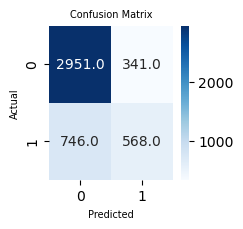

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.84      3292
           1       0.62      0.43      0.51      1314

    accuracy                           0.76      4606
   macro avg       0.71      0.66      0.68      4606
weighted avg       0.75      0.76      0.75      4606

 Depth: 4  and min_sample_leaf parameter:  3 


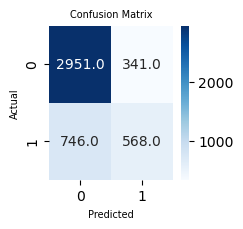

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.84      3292
           1       0.62      0.43      0.51      1314

    accuracy                           0.76      4606
   macro avg       0.71      0.66      0.68      4606
weighted avg       0.75      0.76      0.75      4606

 Depth: 5  and min_sample_leaf parameter:  2 


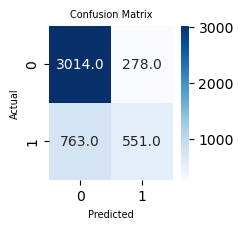

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3292
           1       0.66      0.42      0.51      1314

    accuracy                           0.77      4606
   macro avg       0.73      0.67      0.68      4606
weighted avg       0.76      0.77      0.76      4606

 Depth: 5  and min_sample_leaf parameter:  3 


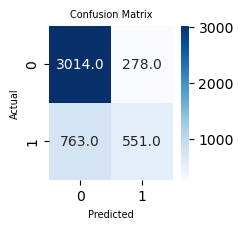

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3292
           1       0.66      0.42      0.51      1314

    accuracy                           0.77      4606
   macro avg       0.73      0.67      0.68      4606
weighted avg       0.76      0.77      0.76      4606

 Depth: 6  and min_sample_leaf parameter:  2 


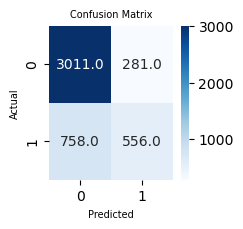

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      3292
           1       0.66      0.42      0.52      1314

    accuracy                           0.77      4606
   macro avg       0.73      0.67      0.68      4606
weighted avg       0.76      0.77      0.76      4606

 Depth: 6  and min_sample_leaf parameter:  3 


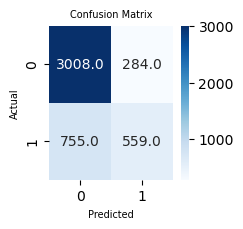

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      3292
           1       0.66      0.43      0.52      1314

    accuracy                           0.77      4606
   macro avg       0.73      0.67      0.69      4606
weighted avg       0.76      0.77      0.76      4606

 ENTROPY 
 Depth: 4  and min_sample_leaf parameter:  2 


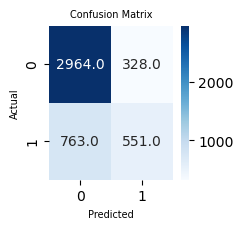

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.84      3292
           1       0.63      0.42      0.50      1314

    accuracy                           0.76      4606
   macro avg       0.71      0.66      0.67      4606
weighted avg       0.75      0.76      0.75      4606

 Depth: 4  and min_sample_leaf parameter:  3 


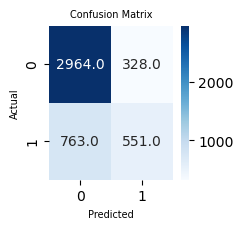

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.84      3292
           1       0.63      0.42      0.50      1314

    accuracy                           0.76      4606
   macro avg       0.71      0.66      0.67      4606
weighted avg       0.75      0.76      0.75      4606

 Depth: 5  and min_sample_leaf parameter:  2 


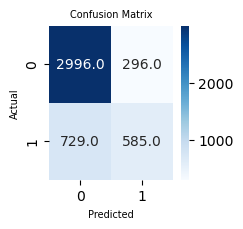

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      3292
           1       0.66      0.45      0.53      1314

    accuracy                           0.78      4606
   macro avg       0.73      0.68      0.69      4606
weighted avg       0.76      0.78      0.76      4606

 Depth: 5  and min_sample_leaf parameter:  3 


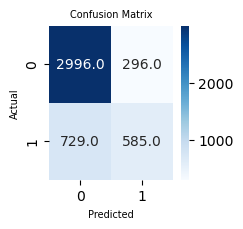

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      3292
           1       0.66      0.45      0.53      1314

    accuracy                           0.78      4606
   macro avg       0.73      0.68      0.69      4606
weighted avg       0.76      0.78      0.76      4606

 Depth: 6  and min_sample_leaf parameter:  2 


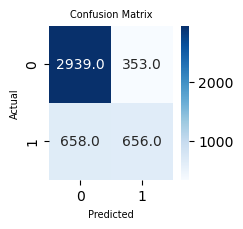

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3292
           1       0.65      0.50      0.56      1314

    accuracy                           0.78      4606
   macro avg       0.73      0.70      0.71      4606
weighted avg       0.77      0.78      0.77      4606

 Depth: 6  and min_sample_leaf parameter:  3 


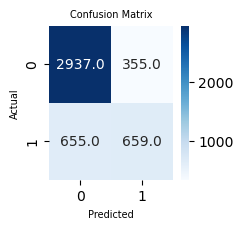

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3292
           1       0.65      0.50      0.57      1314

    accuracy                           0.78      4606
   macro avg       0.73      0.70      0.71      4606
weighted avg       0.77      0.78      0.77      4606



In [378]:
# References: https://www.kaggle.com/code/madhuribh/bank-marketing-campaign-using-decision-tree
# https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

#range for depths and min sample leaf
depths = [4,5,6]
samples = [2,3]
criteria = ['gini','entropy']
bold_start = '\033[1m'
bold_end   = '\033[0m'
for cr in criteria:
    print(bold_start,cr.upper(),bold_end)
    for i in depths:
        for j in samples:
            classifier = DecisionTreeClassifier(criterion = cr, max_depth = i ,min_samples_leaf = j)
            classifier.fit(X_train_data,Y_train_data)
            prediction = classifier.predict(X_test_data)

            print(bold_start,"Depth:",i," and min_sample_leaf parameter: ",j,bold_end)
            cf_matrix = confusion_matrix(Y_test_data,prediction)

            plt.figure(figsize=(2,2))

            heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f')
            heatmap.set_title('Confusion Matrix',fontsize = 7);
            heatmap.set_xlabel('Predicted',fontsize = 7)
            heatmap.set_ylabel('Actual',fontsize = 7);
            ## Display the visualization of the Confusion Matrix.
            plt.show()

            print("Classification Report")
            print(classification_report(Y_test_data,prediction))

### Compare the results of the classifier using gini and entropy

The following are the accuracy score obtained:

GINI<br>
Accuracy score for max_depth 4 and min_sample_leaf 2:  0.7640034737299175 <br>
Accuracy score for max_depth 4 and min_sample_leaf 3:  0.7640034737299175<br>
Accuracy score for max_depth 5 and min_sample_leaf 2:  0.7739904472427269<br>
Accuracy score for max_depth 5 and min_sample_leaf 3:  0.7739904472427269<br>
Accuracy score for max_depth 6 and min_sample_leaf 2:  0.7744246634824142<br>
Accuracy score for max_depth 6 and min_sample_leaf 3:  0.7742075553625706<br>


ENTROPY<br>
Accuracy score for max_depth 4 and min_sample_leaf 2:  0.7631350412505428<br>
Accuracy score for max_depth 4 and min_sample_leaf 3:  0.7631350412505428<br>
Accuracy score for max_depth 5 and min_sample_leaf 2:  0.7776812852800695<br>
Accuracy score for max_depth 5 and min_sample_leaf 3:  0.7774641771602258<br>
Accuracy score for max_depth 6 and min_sample_leaf 2:  0.780720798957881<br>
Accuracy score for max_depth 6 and min_sample_leaf 3:  0.780720798957881<br>

By this we can observe that for depth 4, gini has a better accuracy than entropy.<br>
For depth 5 ad 6 we can see that entropy performs better than gini.

### Print the decision tree visualization with depth of 5

 GINI 


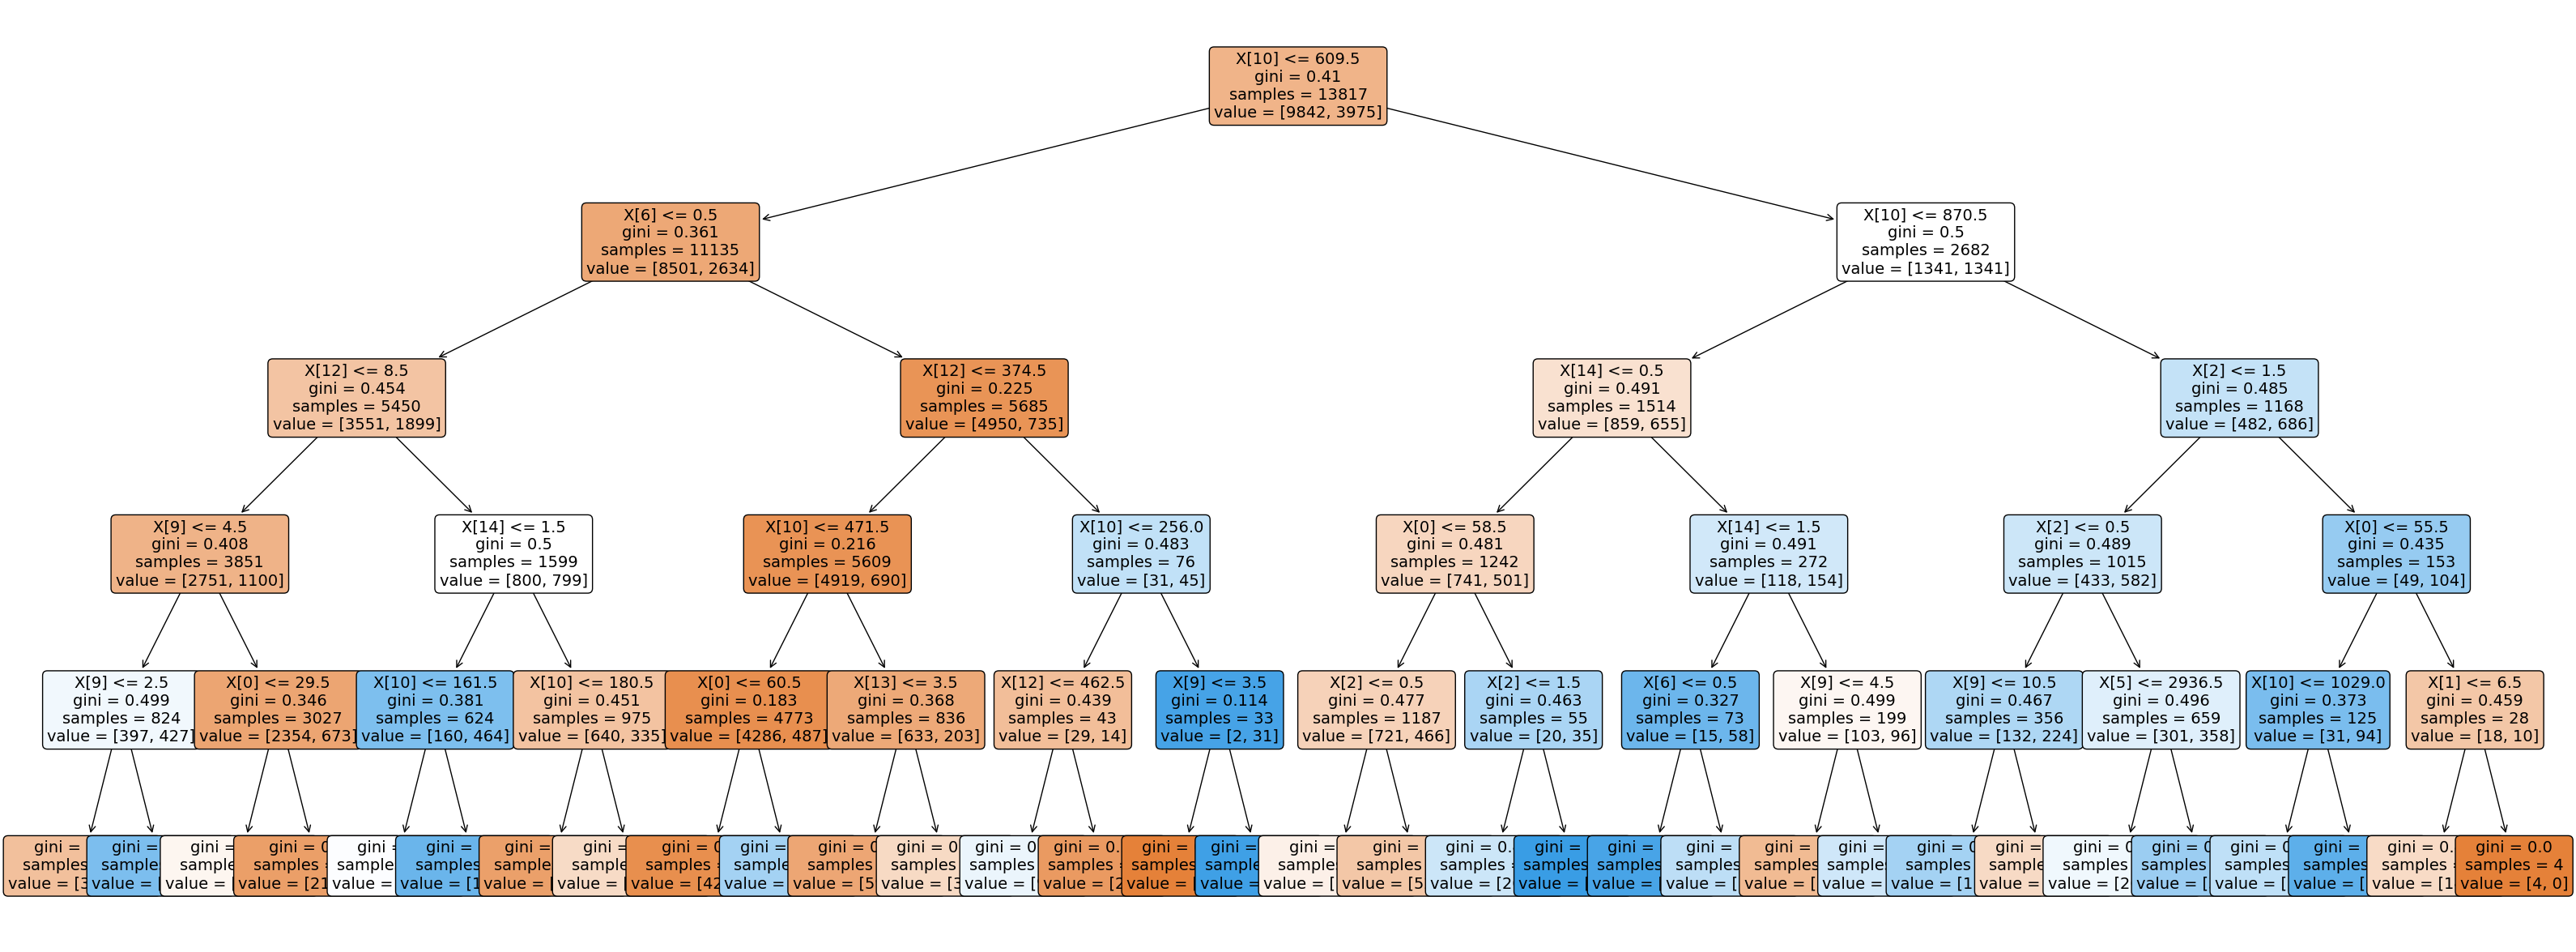

 ENTROPY 


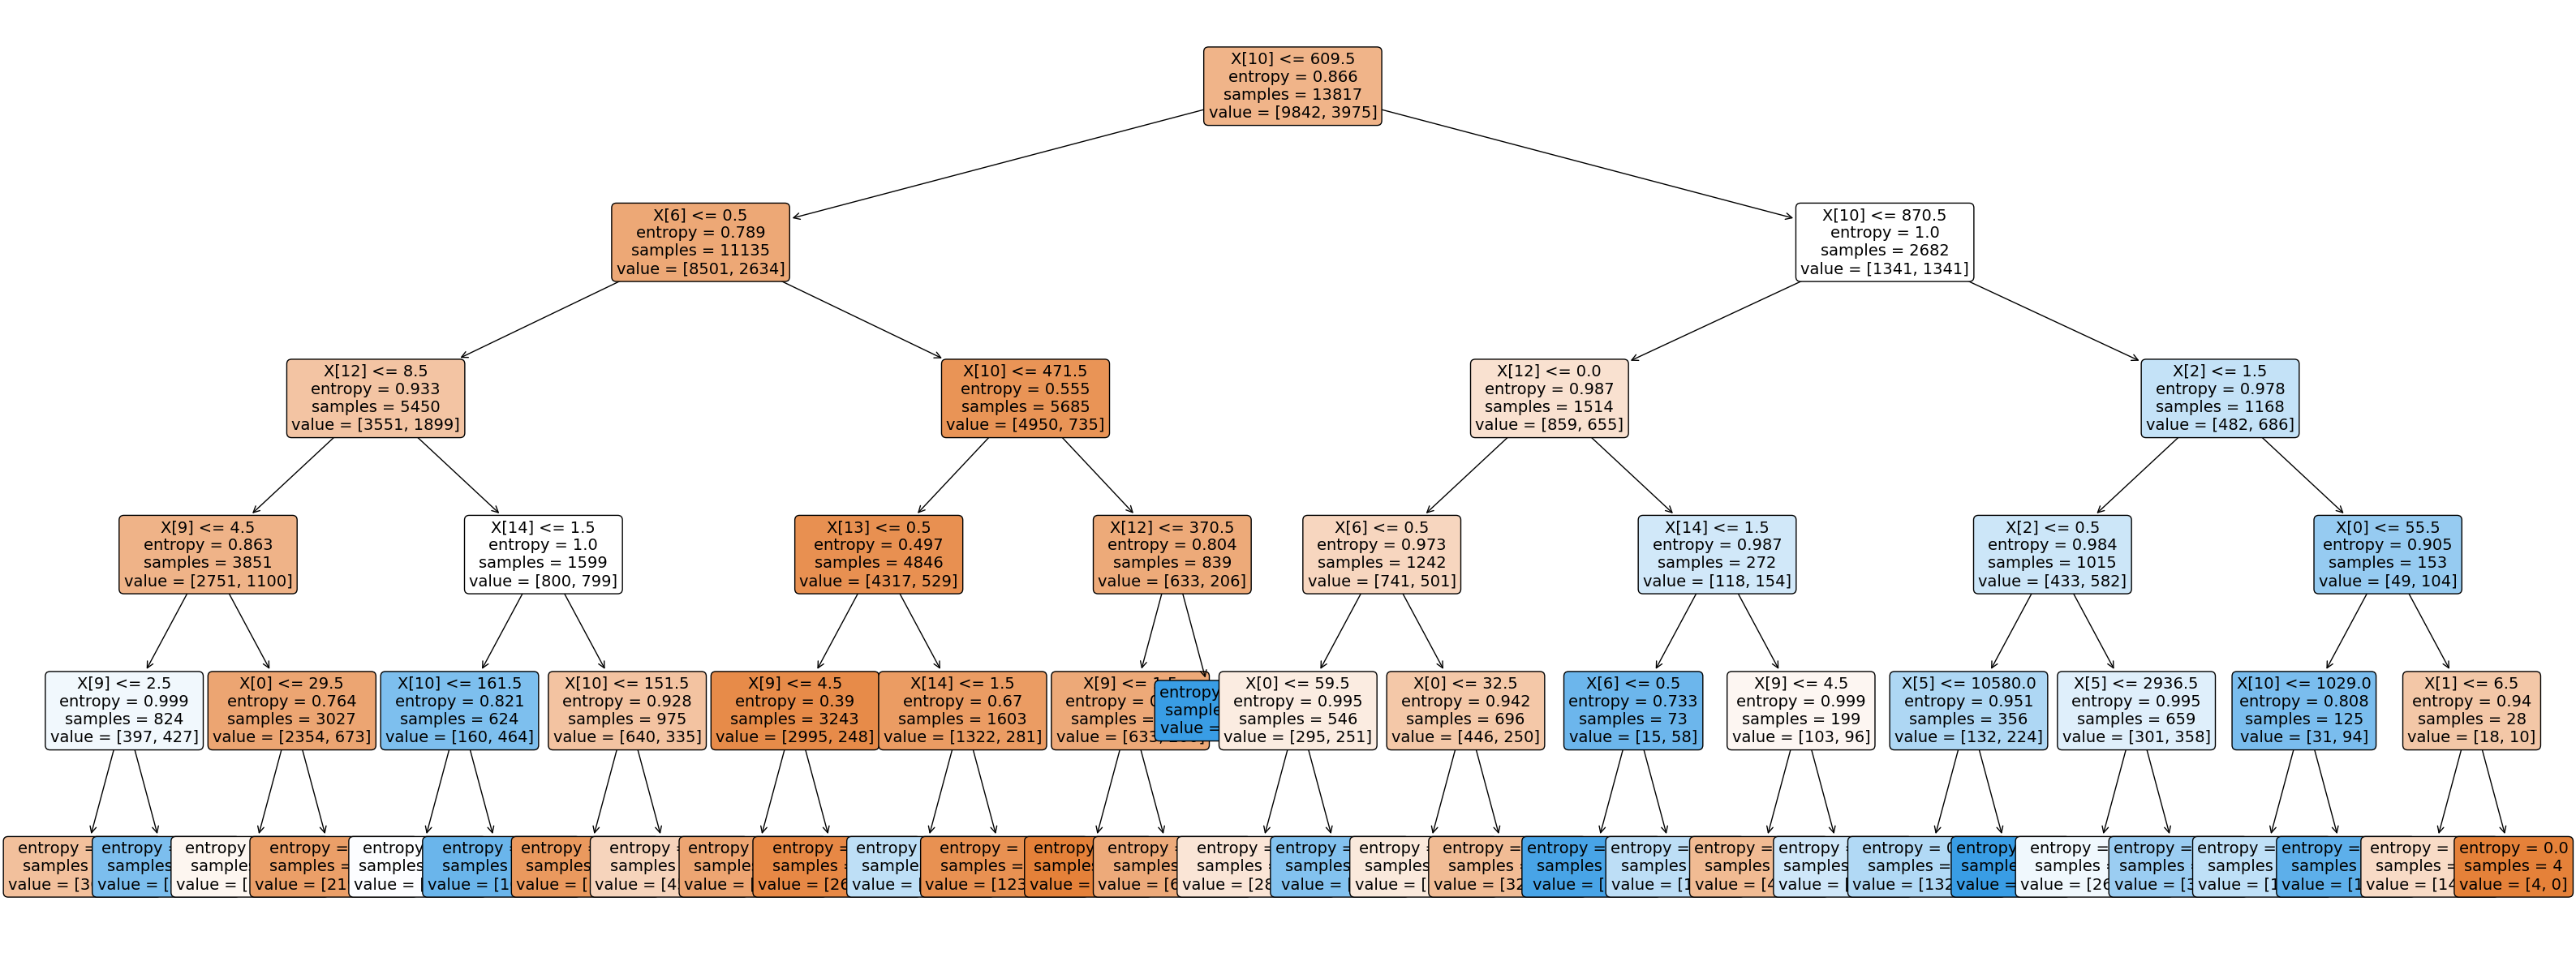

In [379]:
criteria = ['gini','entropy']
for i in criteria:
    print(bold_start,i.upper(),bold_end)

    classifier = DecisionTreeClassifier(criterion = i, max_depth = 5)
    classifier.fit(X_train_data,Y_train_data)
    plt.figure(figsize=(40,15))

    #create the tree plot
    fig = tree.plot_tree(classifier,rounded = True, filled = True, fontsize = 14)

    #displaying the plot
    plt.show()


### Team contribution

Kartik Kataria : Worked on the Nearest Neighbor classifier part of the assignment

Pasam Venkata Sravanthi : Focused on the Decision Tree classifier

Suraj Pawar Vadeghar : Dealt with Naive Bayes classifier in the assignment.

#### References
1) https://towardsdatascience.com/3-ultimate-ways-to-deal-with-missing-values-in-python-ac5a17c53787#:~:text=You%20can%20use%20pandas%20DataFrame,contain%20atleast%20one%20missing%20value.

2) https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f#:~:text=To%20find%20duplicates%20on%20a,()%20method%20on%20the%20column.&text=The%20result%20is%20a%20boolean,identical%20to%20a%20previous%20one.

3) https://www.datasciencesmachinelearning.com/2018/11/handling-missing-values-in-python.html

4) http://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.DataFrame.interpolate.html

5) https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e#:~:text=Delete%20Rows%20with%20Missing%20Values,entire%20column%20can%20be%20dropped.

6) https://towardsdatascience.com/3-ultimate-ways-to-deal-with-missing-values-in-python-ac5a17c53787#:~:text=You%20can%20use%20pandas%20DataFrame,contain%20atleast%20one%20missing%20value.

7) https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f#:~:text=To%20find%20duplicates%20on%20a,()%20method%20on%20the%20column.&text=The%20result%20is%20a%20boolean,identical%20to%20a%20previous%20one.

8) https://www.kaggle.com/code/vaishnavi28krishna/imbalanced-data-process-and-decsision-tree#Encoding

9) https://aicorespot.io/%E2%80%8Bhow-to-calculate-feature/

10) https://www.kaggle.com/code/madhuribh/bank-marketing-campaign-using-decision-tree
